1. Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

2. Data loading and understanding

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [ ]:
import os
file_path = os.path.join(path, 'WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = pd.read_csv(file_path)

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
pd.set_option('display.max_columns', None) # to avoid the truncation of the data

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#dropping the customerId as it is not necessary
df = df.drop(columns=['customerID'])

In [ ]:
# printing the unique values for each column
for col in df.columns:
  print(col, df[col].unique())
  print('--'*50)

gender ['Female' 'Male']
----------------------------------------------------------------------------------------------------
SeniorCitizen [0 1]
----------------------------------------------------------------------------------------------------
Partner ['Yes' 'No']
----------------------------------------------------------------------------------------------------
Dependents ['No' 'Yes']
----------------------------------------------------------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
----------------------------------------------------------------------------------------------------
PhoneService ['No' 'Yes']
----------------------------------------------------------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
-

In [ ]:
len(df[df['TotalCharges']==' '])

11

In [ ]:
# so here we found out that there is empty strings with spaces and so it is not considered as null values
# it is because the totalcharges = tenure * monthlycharges, but at some places we have tenure = 0 so we can replace the spaces of total charges as 0
df['TotalCharges'] = df['TotalCharges'].replace({' ':'0.0'})

In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
#checking the distribution of the target column
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


Insights
1. CuatomerID was removed as it was not required for modelling
2. No missing values in the dataset
3. Missing values in the TotalCharges column were replaced with 0
4. Target class imbalance identified

3. Exploratory Data Analysis(EDA)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Numerical Features Analysis

In [ ]:
def plot_histogram(df, column):
  plt.figure(figsize=(5,3))
  sns.histplot(df[column], kde=True)
  plt.title(f'Distribution of {column}')

  # Adding the vertical line of mean and median
  col_mean = df[column].mean()
  col_median = df[column].median()
  plt.axvline(col_mean, color='red', linestyle='--', label = 'Mean')
  plt.axvline(col_median, color='green', linestyle='-', label = 'Median')\

  plt.legend()

  plt.show()

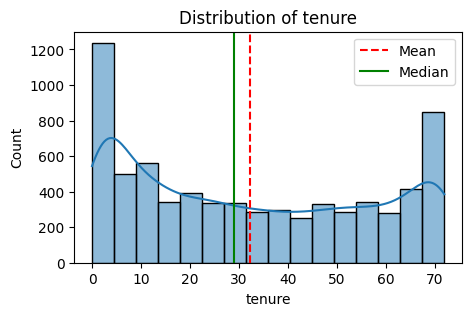

In [ ]:
plot_histogram(df, 'tenure')

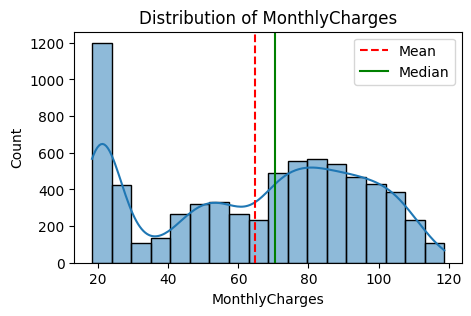

In [ ]:
plot_histogram(df, 'MonthlyCharges')

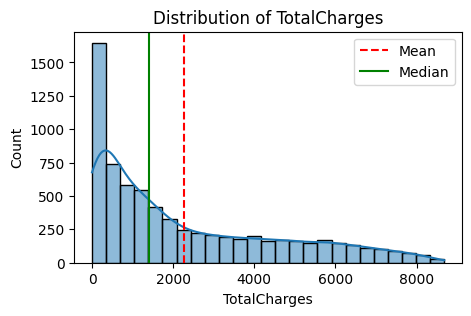

In [ ]:
plot_histogram(df, 'TotalCharges')

In [ ]:
def plot_boxplot(df, column):
  plt.figure(figsize=(5,3))
  sns.boxplot(df[column])
  plt.title(f'Boxplot of {column}')
  plt.ylabel(column)
  plt.show()

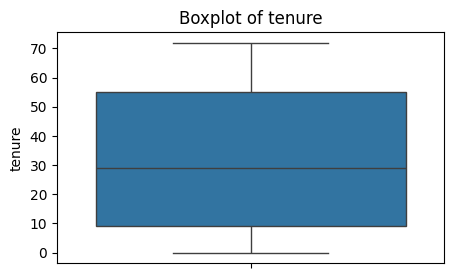

In [ ]:
plot_boxplot(df, 'tenure')

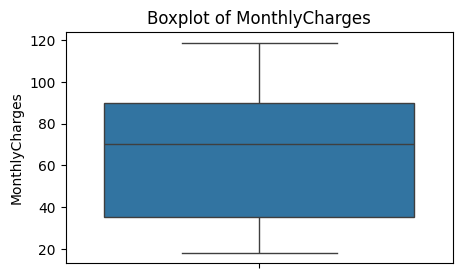

In [ ]:
plot_boxplot(df, 'MonthlyCharges')

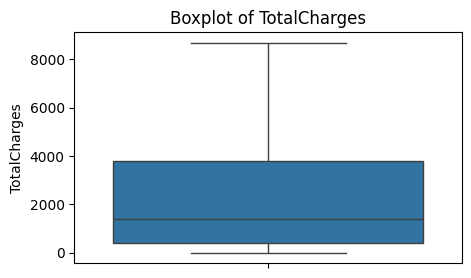

In [ ]:
plot_boxplot(df, 'TotalCharges')

Correlation Heatmap for numerical columns


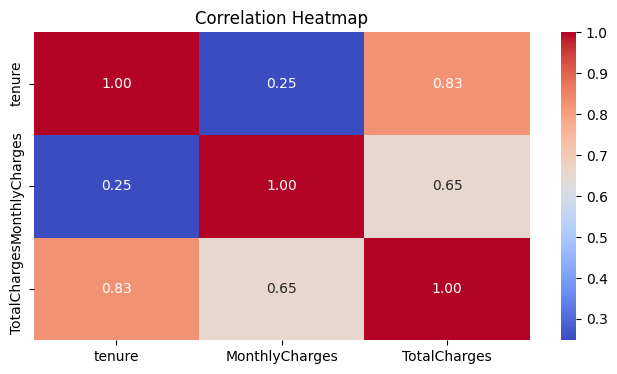

In [ ]:
from typing import ChainMap
plt.figure(figsize=(8,4))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()


Analysis on the categorical features

Countplot for categorical data

In [ ]:

object_cols = df.select_dtypes(include=['object']).columns.tolist()
object_cols = object_cols + ['SeniorCitizen']
object_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

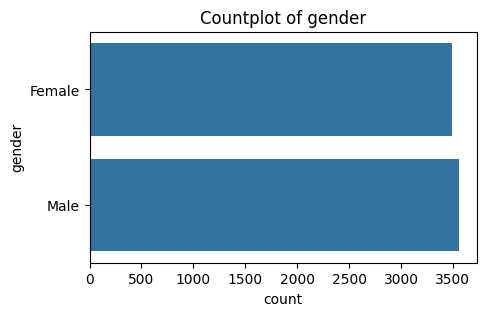

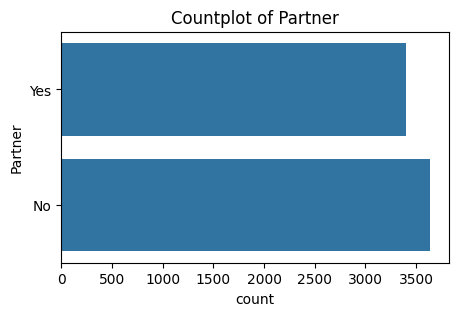

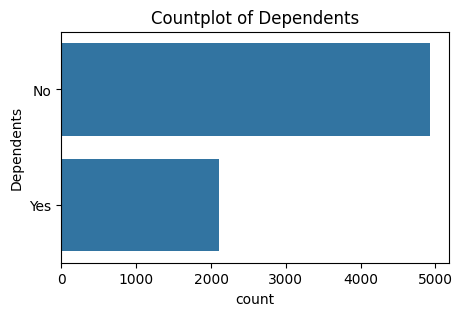

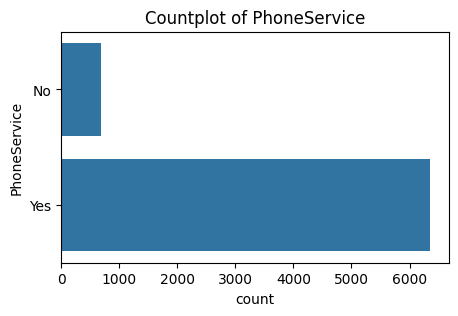

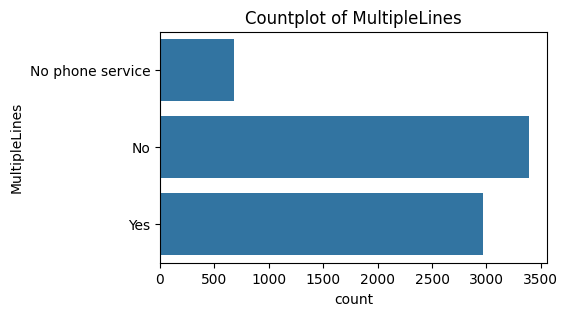

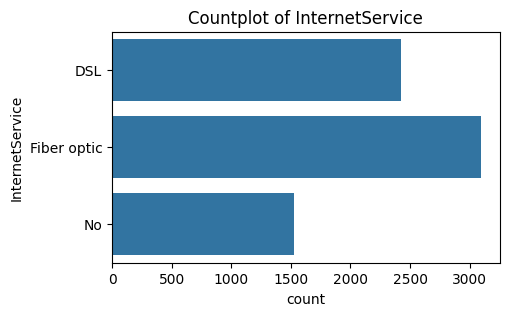

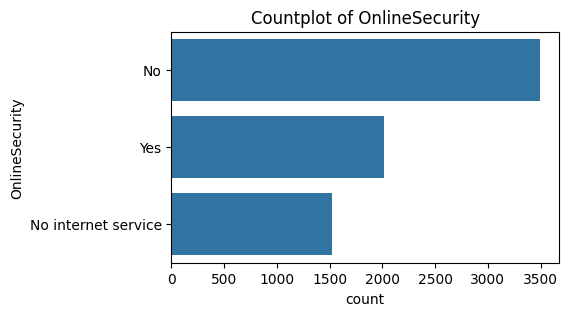

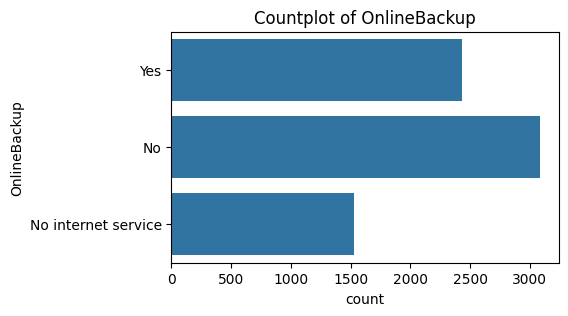

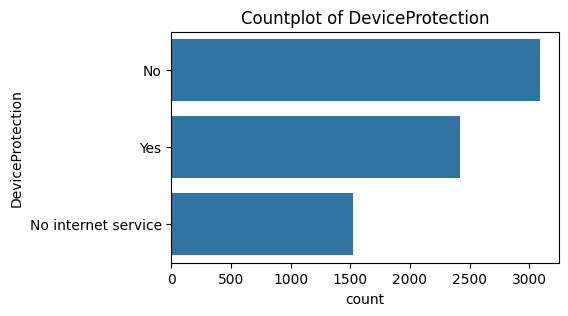

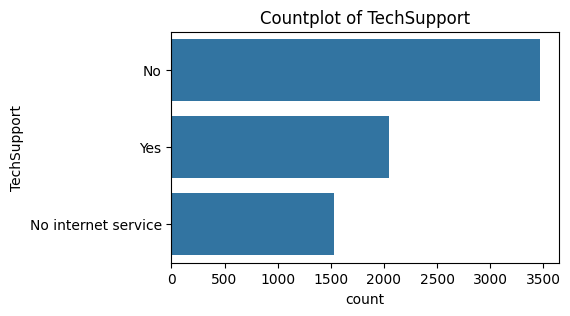

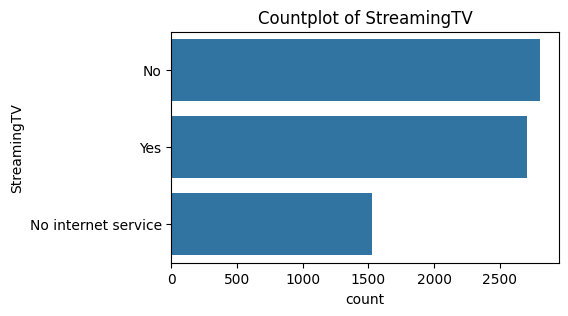

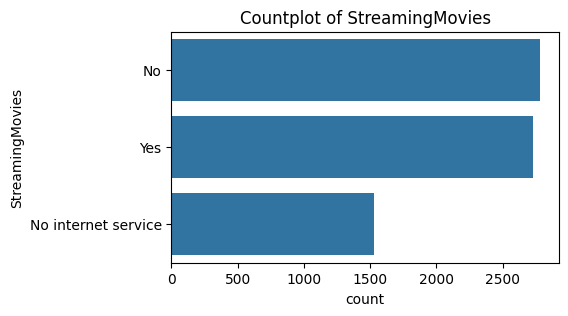

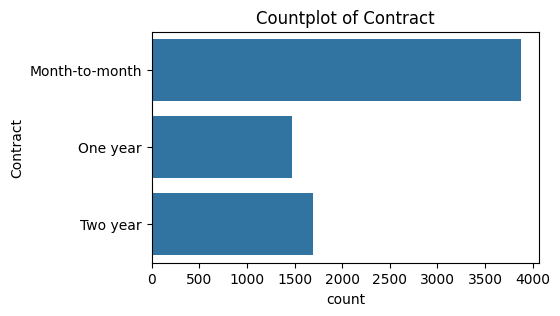

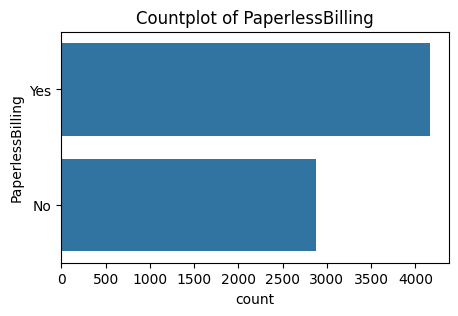

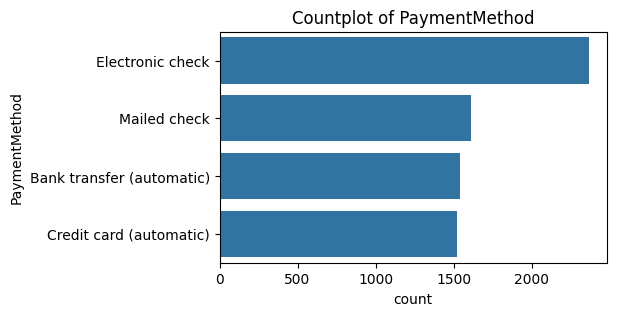

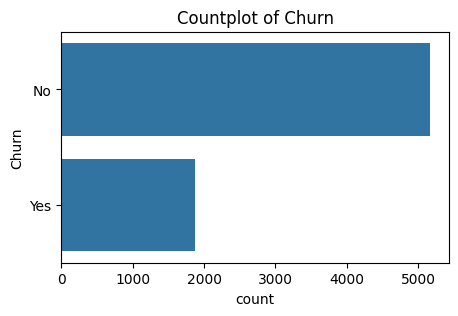

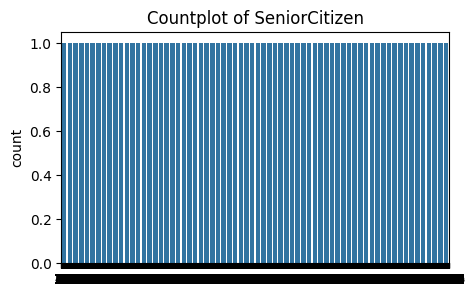

In [ ]:
for cols in object_cols:
  plt.figure(figsize=(5,3))
  sns.countplot(df[cols])
  plt.title(f'Countplot of {cols}')
  plt.show()

4. Data Preprocessing

In [ ]:
# encoding the target variable
df['Churn'] = df['Churn'].replace({'No':0, 'Yes':1})

/tmp/ipython-input-4203733846.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'No':0, 'Yes':1})


In [ ]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


Label encoding the categorical columns

In [ ]:
object_columns = df.select_dtypes(include = 'object').columns.to_list()
object_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
encoders = {}# whenever we will use the new data the encoder should same so we are storing every encoder for the each variable to a dictionary so that we can use it later

for cols in object_columns:
  le = LabelEncoder()
  df[cols] = le.fit_transform(df[cols])
  encoders[cols] = le

In [ ]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [ ]:
df.head() # every column is numerical now

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Training and test data split

In [ ]:
x = df.drop(columns = ['Churn'])
y = df['Churn']

In [ ]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Applying Synthetic Minority Oversampling Technique(SMOTE) for imbalance in the target data

In [ ]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [ ]:
y_train_smote.value_counts() # so it is equal now

,count
Churn,
0,4138
1,4138


5. Model Training

Trying it on different models

In [ ]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [ ]:
cv_scores = {} # dictionary to store cross validation scores

for model_name, model in models.items():
  print(f'Training:{model_name}')
  cv_score = cross_val_score(model, x_train_smote, y_train_smote, cv=5, scoring='accuracy')
  cv_scores[model_name] = cv_score
  print(f'{model_name} cross_validation_accuracy: {np.mean(cv_score):.2f}')
  print('---'*20)



Training:Decision Tree
Decision Tree cross_validation_accuracy: 0.78
------------------------------------------------------------
Training:Random Forest
Random Forest cross_validation_accuracy: 0.84
------------------------------------------------------------
Training:XGBoost
XGBoost cross_validation_accuracy: 0.83
------------------------------------------------------------


RamdomForest gave the highest accuracy so we are proceeding with it

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)
print("Best Params:", grid_search.best_params_)

Best Params: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
rfc = RandomForestClassifier(class_weight='balanced', max_depth = 10, min_samples_split = 10, n_estimators = 200, random_state=42)
rfc.fit(x_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=10, n_estimators=200, random_state=42)

6. Model evalution

In [ ]:
# evaluating it on the test data

y_pred = rfc.predict(x_test)

print(f'Accuracy:\n{accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Accuracy:
0.7771469127040455
Confusion Matrix:
[[832 204]
 [110 263]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1036
           1       0.56      0.71      0.63       373

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.78      0.78      1409



Top 5 Churn Drivers:
           Feature  Importance
14        Contract    0.207013
8   OnlineSecurity    0.130324
4           tenure    0.107242
11     TechSupport    0.104668
17  MonthlyCharges    0.088104


/tmp/ipython-input-2914010489.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


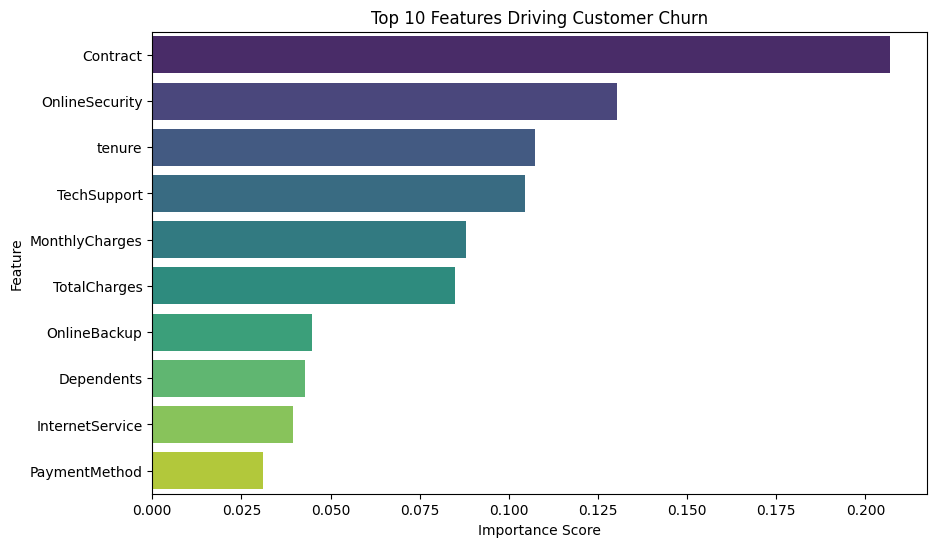

In [ ]:
# finding the most important feature driving customer churn
importances = rfc.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': x_train_smote.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top 5 Churn Drivers:")
print(feature_importance_df.head(5))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Features Driving Customer Churn')
plt.xlabel('Importance Score')
plt.show()